# Visualization

In [1]:
import pickle
import torch
import torch.nn as nn
import torchvision.models as models
from torchmetrics import AveragePrecision
from torchmetrics import Recall
import numpy as np
import matplotlib.pyplot as plt
from data import get_dataloaders

import warnings
warnings.filterwarnings('ignore')

In [2]:
path = 'results/results_resnet18_4_001.pkl'

with open(path, 'rb') as handle:
    data = pickle.load(handle)

## Accuracy v.s. Epoch

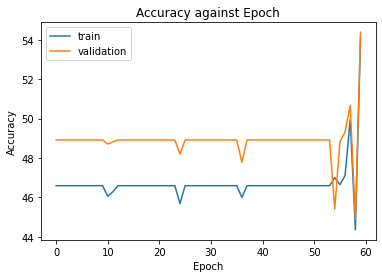

In [3]:
plt.title(f'Accuracy against Epoch')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.plot(data['train_acc'], label = 'train')
plt.plot(data['val_acc'], label = 'validation')
plt.legend()

# Loss v.s. Epoch

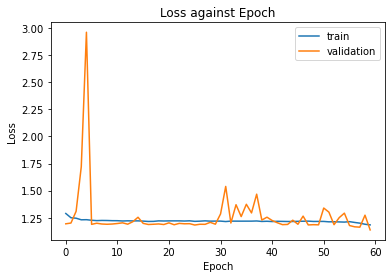

In [4]:
plt.title(f'Loss against Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.plot(data['train_loss'], label = 'train')
plt.plot(data['val_loss'], label = 'validation')
plt.legend()

# Performance on Test Set

Test loss and accuracy:

In [5]:
print("Test Loss:", data['test_loss'])
print("Test Accuracy:", data['test_acc'])

Test Loss: 1.1577447627243822
Test Accuracy: 54.1701073492981


In [6]:
device = torch.device("cuda:{}".format(0) if torch.cuda.is_available() else 'cpu')
dataloader = get_dataloaders('data/train_resized.hdf5', 'data/study_label.csv')
model = models.resnet18(num_classes=4)
model.conv1 = nn.Conv2d(1, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
model.load_state_dict(torch.load("models/results_resnet18_4_001.pt", map_location=device))
model = model.to(device)
criterion = nn.CrossEntropyLoss()

Test recall and mean precision:

In [7]:
average_precision = AveragePrecision(num_classes=4, average=None)
recall = Recall(num_classes=4).to(device)
with torch.no_grad():
    for inputs, targets in dataloader:
        # Loss
        inputs, targets = inputs.to(device), targets.to(device)
        outputs = model(inputs)
        average_precision.update(outputs, targets)
        recall.update(outputs, targets)

print(average_precision.compute())
print(recall.compute())

[tensor(0.4797, device='cuda:0'), tensor(0.6148, device='cuda:0'), tensor(0.1863, device='cuda:0'), tensor(0.0725, device='cuda:0')]
tensor(0.5359, device='cuda:0')
